In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [2]:
filename = "D:\word prediction kabir das\kabirDas.txt"
data = open(filename, 'r', encoding='utf-8').read()
print(data[:300])

इस दोहे मे कबीर दास जी कहते हैं कि अगर हमारे सामने ईश्वर और गुरु एक साथ खड़े हैं तो हमें किसके चरण स्पर्श करना चाहिए। गुरु ने अपने ज्ञान के द्वारा ही हमें ईश्वर से मिलने का रास्ता बताया है इसलिए गुरु की महिमा ईश्वर से ऊपर है। इसलिए हमें पहले गुरु के चरण स्पर्श करना चाहिए। इस दोहे मे कबीर दास जी कहते 


In [6]:
# tokens = []
# sent = ""
# for i in data:
#     print(i)
#     if i in ["!","।","?"]:
#         tokens.append(sent)
#         sent=""
#     else:
#         sent+=i

In [7]:
# print(tokens)

In [3]:
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        yhat = np.argmax(model.predict(encoded), axis=-1)
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        in_text += ' ' + out_word
    return in_text

def generate(seed_text,n):
  return generate_seq(model,tokenizer,max_length-1,seed_text,int(n))

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [5]:
vocab_size = len(tokenizer.word_index) + 1
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)

In [6]:
print('Total Sequences: %d' % len(sequences))
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 1622
Max Sequence Length: 3


In [7]:
from numpy import array

sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

In [8]:
model=Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2, 10)             6290      
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               24400     
_________________________________________________________________
dense (Dense)                (None, 629)               63529     
Total params: 94,219
Trainable params: 94,219
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
history = model.fit(X, y, epochs=500, verbose=2, callbacks=callbacks_list)

Epoch 1/250
51/51 - 4s - loss: 6.4307 - accuracy: 0.0284

Epoch 00001: loss improved from inf to 6.43073, saving model to weights-improvement-01-6.4307-bigger.hdf5
Epoch 2/250
51/51 - 0s - loss: 6.2616 - accuracy: 0.0333

Epoch 00002: loss improved from 6.43073 to 6.26160, saving model to weights-improvement-02-6.2616-bigger.hdf5
Epoch 3/250
51/51 - 0s - loss: 5.7905 - accuracy: 0.0333

Epoch 00003: loss improved from 6.26160 to 5.79050, saving model to weights-improvement-03-5.7905-bigger.hdf5
Epoch 4/250
51/51 - 0s - loss: 5.6587 - accuracy: 0.0333

Epoch 00004: loss improved from 5.79050 to 5.65870, saving model to weights-improvement-04-5.6587-bigger.hdf5
Epoch 5/250
51/51 - 0s - loss: 5.5814 - accuracy: 0.0339

Epoch 00005: loss improved from 5.65870 to 5.58138, saving model to weights-improvement-05-5.5814-bigger.hdf5
Epoch 6/250
51/51 - 0s - loss: 5.4926 - accuracy: 0.0277

Epoch 00006: loss improved from 5.58138 to 5.49265, saving model to weights-improvement-06-5.4926-bigger.h

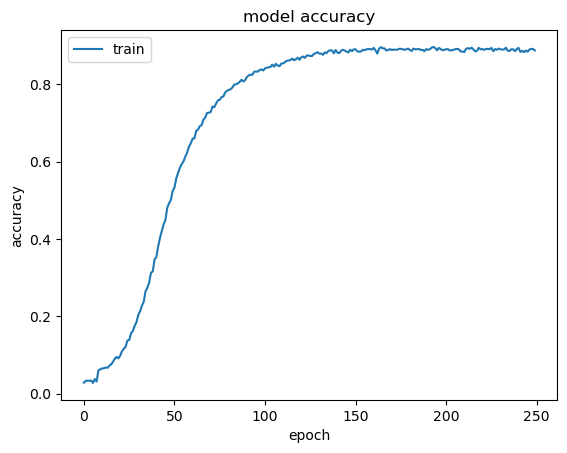

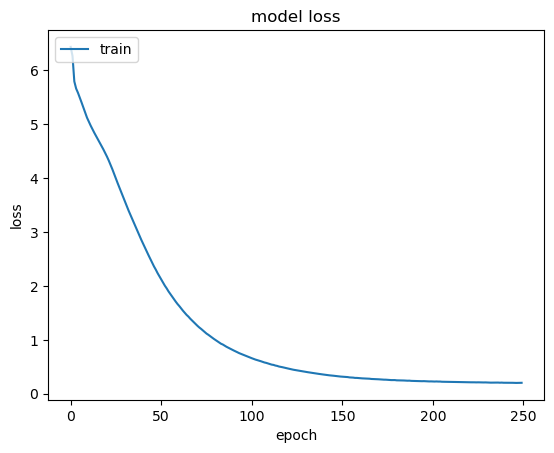

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print(generate_seq(model, tokenizer, max_length-1, 'कबीर कहते हैं ', 20))
print(generate_seq(model, tokenizer, max_length-1, 'इस संसार का नियम यही', 10))
print(generate_seq(model, tokenizer, max_length-1, 'गुरु', 10))

कबीर कहते हैं  कि एक छोटे से तिनके की भी कभी निंदा न करो जो तुम्हारे पांवों के नीचे दब जाता है। यदि
इस संसार का नियम यही है कि जो उदय हुआ है वह मुरझा जाएगा। जो
गुरु की महिमा ईश्वर से मिलने का रास्ता बताया है इसलिए
